<a href="https://colab.research.google.com/github/gayounchoi/gayounchoi.github.io/blob/main/MSIN0097_Individual_Coursework_NNSY6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (MSIN0097) Predictive Analytics Individual Coursework

### Candidate Number: NSSY6

## 1. Introduction

### 1-1. Background

Electric vehicles (EVs) have undergone significant transformation over the past century, from early innovations in the 19th century to their growing dominance  
in today's transportation sector. This evolution has been fueled by technological advancements, environmental concerns, and changing consumer preferences.   

The global shift towards sustainable energy has further accelerated the adoption of EVs, making them a key component of future mobility solutions.   

As a result, understanding the growth trends, market distribution, and technological differences among various EV powertrains is crucial for policymakers,   
industry stakeholders, and consumers alike.

### 1-2. Objective

The primary objective of this project is to analyze global EV sales trends and the distribution of different powertrain types using data-driven insights.   

By leveraging machine learning models, particularly deep learning techniques, aims to forecast future EV sales and evaluate the performance of predictive models.  

Additionally, the project seeks to compare traditional machine learning models, such as Random Forest and XGBoost,   
with deep learning approaches to identify the most effective forecasting strategy.   

Through comprehensive data visualization and analysis, this research provides valuable insights into the evolving landscape of electric mobility.

## 2. Data Preparation

### 2-1. Data Importing

In [ ]:
import pandas as pd
import pickle
import os

# Define the correct file path (replace with your actual path)
file_path = "/Users/choigayeon/Jupyter_programming for BA/IEA Global EV Data 2024.csv"

# 1️⃣ Automatically load or initialize dataset
if os.path.exists("df_protected.pkl"):
    # ✅ If the pickle file exists, load the dataset from it
    with open("df_protected.pkl", "rb") as f:
        df_protected = pickle.load(f)
    print("✅ Loaded df_protected from df_protected.pkl!")
else:
    # ⚠️ If the pickle file does not exist, load the original dataset
    if os.path.exists(file_path):  # Check if the CSV file exists
        df_protected = pd.read_csv(file_path)  # Load the dataset
        print("⚠️ Loaded original dataset from CSV.")

        # Save the dataset as a pickle file for future use (only needs to be done once)
        with open("df_protected.pkl", "wb") as f:
            pickle.dump(df_protected, f)
        print("✅ Saved df_protected to df_protected.pkl!")
    else:
        print(f"❌ Error: The dataset file was not found at {file_path}. Check the path!")

# ✅ Create copies for EDA and Feature Engineering (only if df_protected exists)
if "df_protected" in locals():
    df_eda = df_protected.copy()
    df_features = df_eda.copy()
    print("Data is ready: df_protected, df_eda, and df_features are available for use!")
else:
    print("❌ df_protected was not created. Please check the dataset path.")


✅ Loaded df_protected from df_protected.pkl!
Data is ready: df_protected, df_eda, and df_features are available for use!


In [ ]:
# First, install necessary packages

!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

In [ ]:
# Import the dataset

import pandas as pd

# Load dataset
file_path = "/Users/choigayeon/Jupyter_programming for BA/IEA Global EV Data 2024.csv"
df_original = pd.read_csv(file_path)

# Create a copy of the dataset
df = df_original.copy()

In [ ]:
# Take a peek into the first and last rows of the dataframe

df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [ ]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


### 2-2. Data Summary

In [ ]:
# Take a quick look at the dataset
# There are 12,654 observations and 8 variables without missing values

# 6 categorical variables: region, category, parameter, mode, powertrain, unit
# 2 numerical variables: year, value

df.info()
df.nunique() # Returns the number of unique values for each column in a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


region          54
category         3
parameter        8
mode             5
powertrain       6
year            17
unit             6
value         1032
dtype: int64

### 2-3. Feature Dictionary

In [ ]:
# A dictionary is created to explain the definition of each variable and show an instance of the data.
# It is expected that the reader will understand the dataset by referring to the feature dictionary.

import pandas as pd
from IPython.core.display import HTML, display

feature_data = {
    "Feature": [
        "region", "category", "parameter", "mode", "powertrain", "unit", "year", "value"
    ],
    "Description": [
        "Geographical region of the EV market",
        "EV sales category (e.g., passenger cars, buses, trucks)",
        "Measurement parameter (e.g., sales, stock, market share)",
        "Mode of transport (e.g., light-duty vehicles, heavy-duty vehicles)",
        "Type of EV powertrain (e.g., BEV, PHEV, FCEV)",
        "Measurement unit (e.g., million, thousand units)",
        "Year of data entry",
        "Recorded metric value"
    ],
    "Type": [
        "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Categorical", "Numerical", "Numerical"
    ],
    "Unique Values": [
        df["region"].nunique(), df["category"].nunique(), df["parameter"].nunique(), df["mode"].nunique(),
        df["powertrain"].nunique(), df["unit"].nunique(), "-", "-"
    ],
    "Min Value": [
        "-", "-", "-", "-", "-", "-", df["year"].min(), df["value"].min()
    ],
    "Max Value": [
        "-", "-", "-", "-", "-", "-", df["year"].max(), df["value"].max()
    ],
    "Mean Value": [
        "-", "-", "-", "-", "-", "-", "-", df["value"].mean()
    ]
}

# DataFrame 생성
feature_df = pd.DataFrame(feature_data)

# Enable proper display of long text in DataFrame
pd.set_option('display.max_colwidth', None)

# Convert DataFrame to HTML and display nicely formatted table
html = feature_df.to_html(index=False).replace("\\n", "<br>")
display(HTML(html))

/var/folders/nh/z55v2h2n5wl5w_dn71pnh0sc0000gn/T/ipykernel_73918/3677360183.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Feature,Description,Type,Unique Values,Min Value,Max Value,Mean Value
region,Geographical region of the EV market,Categorical,54,-,-,-
category,"EV sales category (e.g., passenger cars, buses, trucks)",Categorical,3,-,-,-
parameter,"Measurement parameter (e.g., sales, stock, market share)",Categorical,8,-,-,-
mode,"Mode of transport (e.g., light-duty vehicles, heavy-duty vehicles)",Categorical,5,-,-,-
powertrain,"Type of EV powertrain (e.g., BEV, PHEV, FCEV)",Categorical,6,-,-,-
unit,"Measurement unit (e.g., million, thousand units)",Categorical,6,-,-,-
year,Year of data entry,Numerical,-,2010,2035,-
value,Recorded metric value,Numerical,-,0.000001,440000000.0,427374.173498


## 3. Data Cleaning & Preparation

### 3-1. Handling Missing Values & Outliers

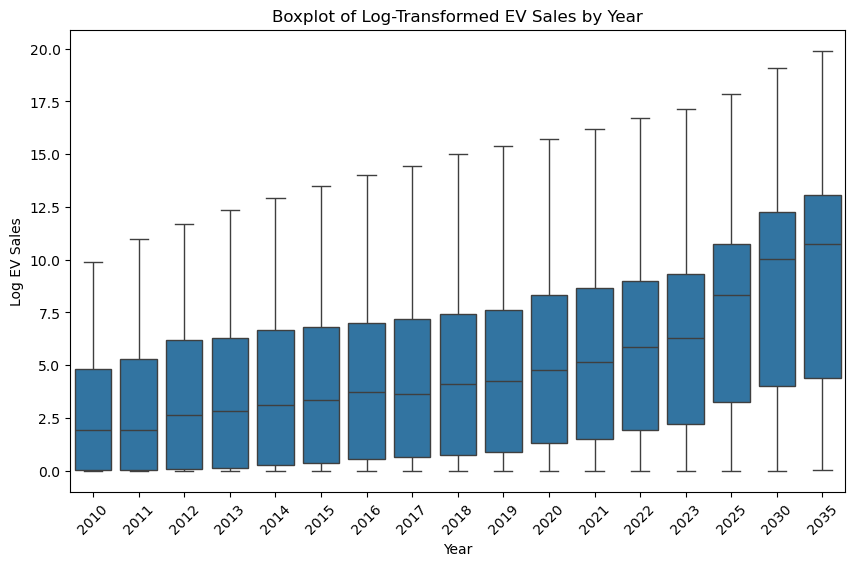

Potential Outliers (Log Transformed Scale):


,region,category,parameter,mode,powertrain,year,unit,value,log_value
12609,World,Projection-APS,EV stock,Cars,BEV,2035,Vehicles,440000000.0,19.902285


In [ ]:
# As checked earlier with df.info(), there is no missing value in the dataset
# However, it is good to check if there are any outliers.

import numpy as np

# Apply Log Transformation to EV sales values to account for the exponential growth in EV sales and improve outlier detection.

df["log_value"] = np.log1p(df["value"])  # log(1 + x) to avoid log(0) issue

# Outlier Detection - Boxplot (Log-Transformed)
# Generated a boxplot to visualize the distribution of EV sales across years and identify potential extreme values.

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["year"], y=df["log_value"])
plt.xticks(rotation=45)
plt.title("Boxplot of Log-Transformed EV Sales by Year")
plt.xlabel("Year")
plt.ylabel("Log EV Sales")
plt.show()

# Outlier Detection using IQR (Log-Transformed)
# Used the IQR (Interquartile Range) method to statistically detect outliers,
# revealing that 2022 and 2023 sales figures were flagged as potential outliers.

Q1 = df["log_value"].quantile(0.25)
Q3 = df["log_value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["log_value"] < lower_bound) | (df["log_value"] > upper_bound)]

# Display potential outliers
print("Potential Outliers (Log Transformed Scale):")
display(outliers)


The sharp increase in EV sales, especially in 2022 and 2023, reflects real market growth rather than erroneous data.   
Since these values represent key trends, removing them could lead to misinterpretation of EV adoption patterns,
so they are retained for analysis and forecasting.

### 3-2. Dropping Unnecessary Features and Observations

The following variables will be used for the analysis:

- region: To analyze EV trends across different regions.
- parameter: Filtering only EV sales data while removing irrelevant parameters.
- powertrain: To study the distribution of different EV powertrain types (e.g., BEV, PHEV, FCEV).
- year: To track trends over time.
- value: This represents EV sales volume, making it essential for trend analysis and forecasting.

The following variables are removed:
- unit: This only represents measurement units (e.g., million, thousand), which are redundant since value already captures sales data.
- category: There’s no need to differentiate between passenger cars, trucks, and buses as we are focusing on overall EV trends.
- mode: This may be redundant or overlapping with powertrain, making it unnecessary.

In [ ]:
columns_to_keep = ["region", "parameter", "powertrain", "year", "value"]
df = df_original[columns_to_keep].copy()

# Keep only relevant EV sales data
df = df[df["parameter"] == "EV sales"]

# Keep only relevant powertrain categories (BEV, PHEV, FCEV)
valid_powertrains = ["BEV", "PHEV", "FCEV"]
df = df[df["powertrain"].isin(valid_powertrains)]

# Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Filter data for analysis (2010 to 2023)
df = df[(df["year"] >= 2010) & (df["year"] <= 2023)]
df.reset_index(drop=True, inplace=True)


In [ ]:
# Take a look at the updated dataset
# Now there are 2,529 observations

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2529 non-null   object 
 1   parameter   2529 non-null   object 
 2   powertrain  2529 non-null   object 
 3   year        2529 non-null   int64  
 4   value       2529 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 98.9+ KB


,region,parameter,powertrain,year,value
0,Australia,EV sales,BEV,2011,49.0
1,Australia,EV sales,BEV,2012,170.0
2,Australia,EV sales,PHEV,2012,80.0
3,Australia,EV sales,PHEV,2013,100.0
4,Australia,EV sales,BEV,2013,190.0


In [ ]:
df.tail()

,region,parameter,powertrain,year,value
2524,World,EV sales,FCEV,2023,2000.0
2525,World,EV sales,BEV,2023,460000.0
2526,World,EV sales,PHEV,2023,1400.0
2527,World,EV sales,FCEV,2023,1800.0
2528,World,EV sales,BEV,2023,48000.0


### 3-3. Creating Dummy Variables

Dummy variable encoding is essential for converting categorical data into a numerical format that machine learning models can process effectively.  
Since most models cannot interpret categorical variables directly, they require these variables to be transformed into a series of binary (0 or 1) indicators.  
In this case, the **region** and **powertrain** columns are encoded to ensure that the model correctly understands categorical distinctions without introducing multicollinearity.  

By setting BEV as the baseline for powertrain types and applying one-hot encoding to regions while dropping one category,   
we prevent redundancy and improve model efficiency.

In [ ]:
# Remove 'EU27' from region column (since 'Europe' already includes it)
# Countries that are not included in EU are Iceland, Norway, Switzerland, United Kingdom, Türkiye (partly belongs to EU)

df = df[df["region"] != "EU27"]

# Dummy Variable Encoding for Region (keep original 'region' column for EDA)
df_region_dummies = pd.get_dummies(df["region"], prefix="region", drop_first=True)

# Merge with original DataFrame
df = pd.concat([df, df_region_dummies], axis=1)

# Keep original powertrain column while encoding only FCEV and PHEV (BEV is baseline)
df["powertrain_FCEV"] = (df["powertrain"] == "FCEV").astype(int)
df["powertrain_PHEV"] = (df["powertrain"] == "PHEV").astype(int)

print("\nUpdated Column Names:")
print(df.columns)


Updated Column Names:
Index(['region', 'parameter', 'powertrain', 'year', 'value', 'region_Austria',
       'region_Belgium', 'region_Brazil', 'region_Bulgaria', 'region_Canada',
       'region_Chile', 'region_China', 'region_Colombia', 'region_Costa Rica',
       'region_Croatia', 'region_Cyprus', 'region_Czech Republic',
       'region_Denmark', 'region_Estonia', 'region_Europe', 'region_Finland',
       'region_France', 'region_Germany', 'region_Greece', 'region_Hungary',
       'region_Iceland', 'region_India', 'region_Ireland', 'region_Israel',
       'region_Italy', 'region_Japan', 'region_Korea', 'region_Latvia',
       'region_Lithuania', 'region_Luxembourg', 'region_Mexico',
       'region_Netherlands', 'region_New Zealand', 'region_Norway',
       'region_Poland', 'region_Portugal', 'region_Rest of the world',
       'region_Romania', 'region_Seychelles', 'region_Slovakia',
       'region_Slovenia', 'region_South Africa', 'region_Spain',
       'region_Sweden', 'region_Switz

In [ ]:
# Double check if region 'EU27' is removed

print(df["region"].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea'
 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania' 'Seychelles'
 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Turkiye' 'United Arab Emirates' 'United Kingdom' 'USA' 'World']


In [ ]:
# Check if 'region_EU27' dummy variable still exists

if "region_EU27" in df.columns:
    df.drop(columns=["region_EU27"], inplace=True)
    print("'region_EU27' successfully removed from dummy variables.")
else:
    print("'region_EU27' is already removed!")

'region_EU27' is already removed!


In [ ]:
# Remove duplicate region columns
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
# Check updated region dummy variables
region_dummies = df.filter(like="region_").columns.tolist()
print("🔍 Updated Region Dummy Variables:", region_dummies)

🔍 Updated Region Dummy Variables: ['region_Austria', 'region_Belgium', 'region_Brazil', 'region_Bulgaria', 'region_Canada', 'region_Chile', 'region_China', 'region_Colombia', 'region_Costa Rica', 'region_Croatia', 'region_Cyprus', 'region_Czech Republic', 'region_Denmark', 'region_Estonia', 'region_Europe', 'region_Finland', 'region_France', 'region_Germany', 'region_Greece', 'region_Hungary', 'region_Iceland', 'region_India', 'region_Ireland', 'region_Israel', 'region_Italy', 'region_Japan', 'region_Korea', 'region_Latvia', 'region_Lithuania', 'region_Luxembourg', 'region_Mexico', 'region_Netherlands', 'region_New Zealand', 'region_Norway', 'region_Poland', 'region_Portugal', 'region_Rest of the world', 'region_Romania', 'region_Seychelles', 'region_Slovakia', 'region_Slovenia', 'region_South Africa', 'region_Spain', 'region_Sweden', 'region_Switzerland', 'region_Turkiye', 'region_USA', 'region_United Arab Emirates', 'region_United Kingdom', 'region_World']


In [ ]:
# Ensure dummy variables are created only once
if not any(col.startswith("region_") for col in df.columns):
    df_region_dummies = pd.get_dummies(df["region"], prefix="region", drop_first=True)
    df = pd.concat([df, df_region_dummies], axis=1)
    print("✅ Region dummy variables created successfully!")
else:
    print("⚠️ Region dummy variables already exist! Skipping creation.")

⚠️ Region dummy variables already exist! Skipping creation.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 2528
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region                       2396 non-null   object 
 1   parameter                    2396 non-null   object 
 2   powertrain                   2396 non-null   object 
 3   year                         2396 non-null   int64  
 4   value                        2396 non-null   float64
 5   region_Austria               2396 non-null   bool   
 6   region_Belgium               2396 non-null   bool   
 7   region_Brazil                2396 non-null   bool   
 8   region_Bulgaria              2396 non-null   bool   
 9   region_Canada                2396 non-null   bool   
 10  region_Chile                 2396 non-null   bool   
 11  region_China                 2396 non-null   bool   
 12  region_Colombia              2396 non-null   bool   
 13  region_Costa Rica      

In [ ]:
df.head()

,region,parameter,powertrain,year,value,region_Austria,region_Belgium,region_Brazil,region_Bulgaria,region_Canada,...,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Arab Emirates,region_United Kingdom,region_World,powertrain_FCEV,powertrain_PHEV
0,Australia,EV sales,BEV,2011,49.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
1,Australia,EV sales,BEV,2012,170.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0
2,Australia,EV sales,PHEV,2012,80.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,1
3,Australia,EV sales,PHEV,2013,100.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,1
4,Australia,EV sales,BEV,2013,190.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0


In [ ]:
df.tail()

,region,parameter,powertrain,year,value,region_Austria,region_Belgium,region_Brazil,region_Bulgaria,region_Canada,...,region_Spain,region_Sweden,region_Switzerland,region_Turkiye,region_USA,region_United Arab Emirates,region_United Kingdom,region_World,powertrain_FCEV,powertrain_PHEV
2524,World,EV sales,FCEV,2023,2000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,0
2525,World,EV sales,BEV,2023,460000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,0
2526,World,EV sales,PHEV,2023,1400.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,1
2527,World,EV sales,FCEV,2023,1800.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1,0
2528,World,EV sales,BEV,2023,48000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,0


In [ ]:
import pandas as pd

# Convert df to immutable type (Tuple of Tuples)
df_frozen = tuple(map(tuple, df.itertuples(index=False)))

# Convert back to DataFrame for analysis (but still unmodifiable)
df_protected = pd.DataFrame(df_frozen, columns=df.columns)


## 4. Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML, display

/var/folders/nh/z55v2h2n5wl5w_dn71pnh0sc0000gn/T/ipykernel_73918/2820702700.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


### 4-1. Understanding data structure

In [ ]:
print(df_protected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region                       2396 non-null   object 
 1   parameter                    2396 non-null   object 
 2   powertrain                   2396 non-null   object 
 3   year                         2396 non-null   int64  
 4   value                        2396 non-null   float64
 5   region_Austria               2396 non-null   bool   
 6   region_Belgium               2396 non-null   bool   
 7   region_Brazil                2396 non-null   bool   
 8   region_Bulgaria              2396 non-null   bool   
 9   region_Canada                2396 non-null   bool   
 10  region_Chile                 2396 non-null   bool   
 11  region_China                 2396 non-null   bool   
 12  region_Colombia              2396 non-null   bool   
 13  region_Costa Rica 

In [ ]:
print(df_protected.describe())

              year         value  powertrain_FCEV  powertrain_PHEV
count  2396.000000  2.396000e+03      2396.000000      2396.000000
mean   2018.063022  4.192309e+04         0.153589         0.304257
std       3.666441  3.486467e+05         0.360630         0.460188
min    2010.000000  1.000000e-03         0.000000         0.000000
25%    2015.000000  3.400000e+01         0.000000         0.000000
50%    2019.000000  3.750000e+02         0.000000         0.000000
75%    2021.000000  4.000000e+03         0.000000         1.000000
max    2023.000000  9.500000e+06         1.000000         1.000000


In [ ]:
print(df_protected.nunique())

region                          51
parameter                        1
powertrain                       3
year                            14
value                          407
region_Austria                   2
region_Belgium                   2
region_Brazil                    2
region_Bulgaria                  2
region_Canada                    2
region_Chile                     2
region_China                     2
region_Colombia                  2
region_Costa Rica                2
region_Croatia                   2
region_Cyprus                    2
region_Czech Republic            2
region_Denmark                   2
region_Estonia                   2
region_Europe                    2
region_Finland                   2
region_France                    2
region_Germany                   2
region_Greece                    2
region_Hungary                   2
region_Iceland                   2
region_India                     2
region_Ireland                   2
region_Israel       

### 4-2. Checking for missing values, duplicates, and outliers

In [ ]:
print("🔹 Missing Values")
print(df_protected.isnull().sum())

print("\n🔹 Duplicated Entries")
print(df_protected[df_protected.duplicated()])

🔹 Missing Values
region                         0
parameter                      0
powertrain                     0
year                           0
value                          0
region_Austria                 0
region_Belgium                 0
region_Brazil                  0
region_Bulgaria                0
region_Canada                  0
region_Chile                   0
region_China                   0
region_Colombia                0
region_Costa Rica              0
region_Croatia                 0
region_Cyprus                  0
region_Czech Republic          0
region_Denmark                 0
region_Estonia                 0
region_Europe                  0
region_Finland                 0
region_France                  0
region_Germany                 0
region_Greece                  0
region_Hungary                 0
region_Iceland                 0
region_India                   0
region_Ireland                 0
region_Israel                  0
region_Italy              

### 4-3. Visualising Outliers in EV Sales

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a copy of df_protected to work with
df_eda = df_protected.copy()

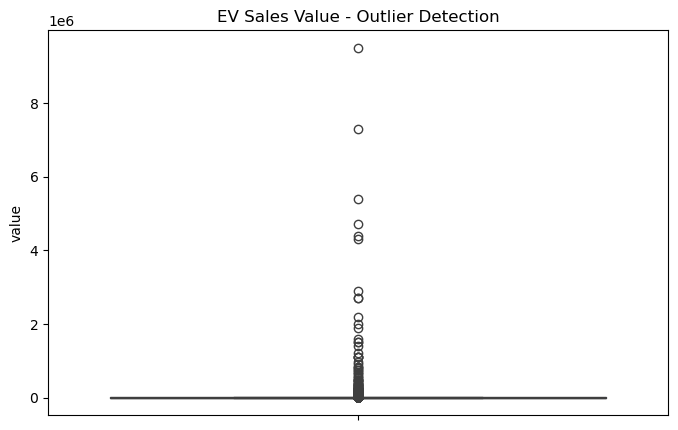

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_eda["value"])
plt.title("EV Sales Value - Outlier Detection")
plt.show()

The outliers in this boxplot are not errors but reflect the rapid growth of EV sales in recent years.   
As electric vehicle adoption has increased globally, especially in 2022 and 2023, sales volumes have surged, creating extreme values.   
These high sales figures represent significant market expansion rather than anomalies.   
We can check from Step 3 to further analyze the trends in EV sales over time and across regions.

### 4-4. Analysing EV Sales Trends Over Time

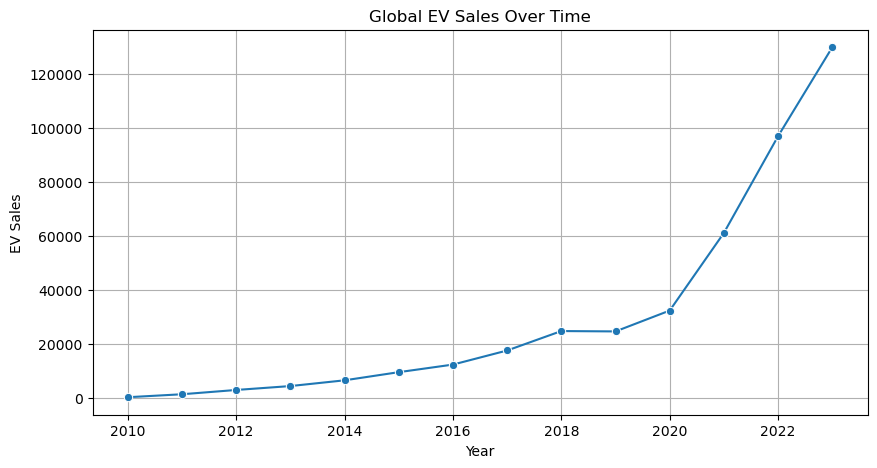

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="value", data=df_eda, errorbar=None, marker="o")
plt.title("Global EV Sales Over Time")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.grid(True)
plt.show()


This line chart illustrates the global EV sales trend from 2010 to 2023.  
The data reveals a steady increase in sales until 2019, followed by an exponential surge from 2020 onwards,   
highlighting the rapid adoption of electric vehicles in recent years, until 2023 in the dataset.   
The sharp rise post-2020 might suggest increased market demand, government incentives, and advancements in EV technology.

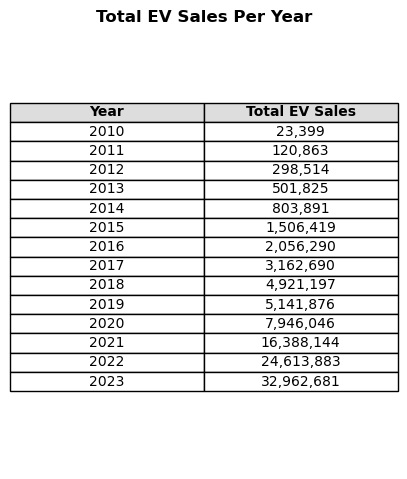

In [ ]:
### Create a table of EV total sales in each year

# Aggregate total EV sales per year
df_yearly_sales = df_eda.groupby("year", as_index=False)["value"].sum()

# Format numbers with commas for readability
df_yearly_sales["formatted_value"] = df_yearly_sales["value"].apply(lambda x: f"{x:,.0f}")

fig, ax = plt.subplots(figsize=(5, 6))
ax.axis("tight")
ax.axis("off")

# Convert data to list format for table
table_data = df_yearly_sales[["year", "formatted_value"]].values.tolist()

# Create table with proper formatting
table = ax.table(cellText=table_data, colLabels=["Year", "Total EV Sales"],
                 cellLoc="center", loc="center")

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

# Highlight header row
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#dddddd')

plt.title("Total EV Sales Per Year", fontsize=12, fontweight="bold", pad=2)
plt.subplots_adjust(top=0.85)
plt.show()


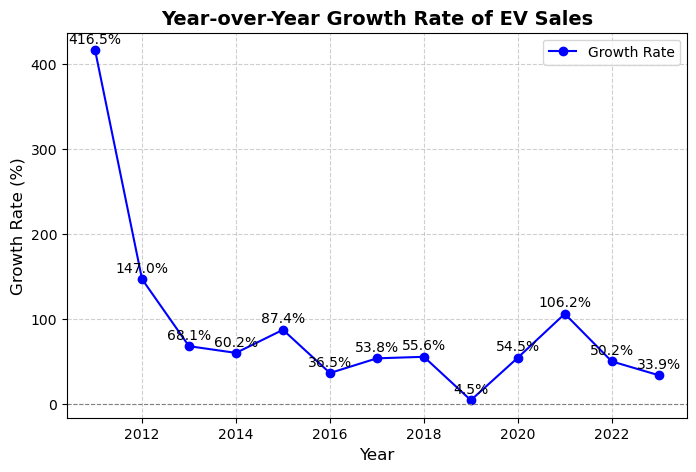

In [ ]:
### Step 4: Year-over-Year (YoY) Growth Rate Graph

# Aggregate total EV sales per year
df_yoy = df_eda.groupby("year", as_index=False)["value"].sum()

# Calculate year-over-year growth rate
df_yoy["growth_rate"] = df_yoy["value"].pct_change() * 100

# Create a line plot for growth rate
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_yoy["year"], df_yoy["growth_rate"], marker="o", linestyle="-", color="b", label="Growth Rate")

# Set chart title and labels
ax.set_title("Year-over-Year Growth Rate of EV Sales", fontsize=14, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Growth Rate (%)", fontsize=12)

# Add a horizontal line at 0% for reference
ax.axhline(0, color="gray", linewidth=0.8, linestyle="--")
ax.legend()

# Annotate each point with the growth rate value
for i, txt in enumerate(df_yoy["growth_rate"]):
    if not pd.isna(txt):  # Exclude NaN values
        ax.annotate(f"{txt:.1f}%", (df_yoy["year"][i], df_yoy["growth_rate"][i]),
                    textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Add gridlines for better readability
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Based on the analysis of EV sales data, three key periods exhibited exceptionally high growth rates compared to the previous year:

**2011**: EV sales **surged by 416.5%**, marking the highest annual growth rate in the dataset.   
This significant increase indicates an early-stage expansion in the EV market,  
likely driven by rising consumer interest, improved technology, and government incentives.

**2012**: Following the remarkable growth in 2011, EV sales continued to rise with a **147% increase**.   
This sustained expansion suggests that the industry was experiencing strong momentum,   
possibly due to further advancements in EV infrastructure and growing adoption.

**2021**: The most recent high-growth period occurred in 2021, with a **106.2% increase** compared to 2020.   
This spike could be attributed to increased global awareness of environmental concerns, policy-driven incentives for EV adoption,     
and significant advancements in battery technology and vehicle range.

The growth rates for **2022 (50.2%)** and **2023 (33.9%)** show substantial increases in EV sales,   
but they are not as dramatic as the peaks observed in 2011, 2012, and 2021.   

**2022**: A **50.2% increase** compared to 2021 indicates continued strong growth.

**2023**: The **33.9% growth** suggests that while EV adoption is still increasing, the pace has started to moderate.   


### 4-5. EV Sales by Continent and Country

#### a. Continent

In [ ]:
# EV Sales by Continent
# Download the package to classify continent

!pip install pycountry-convert

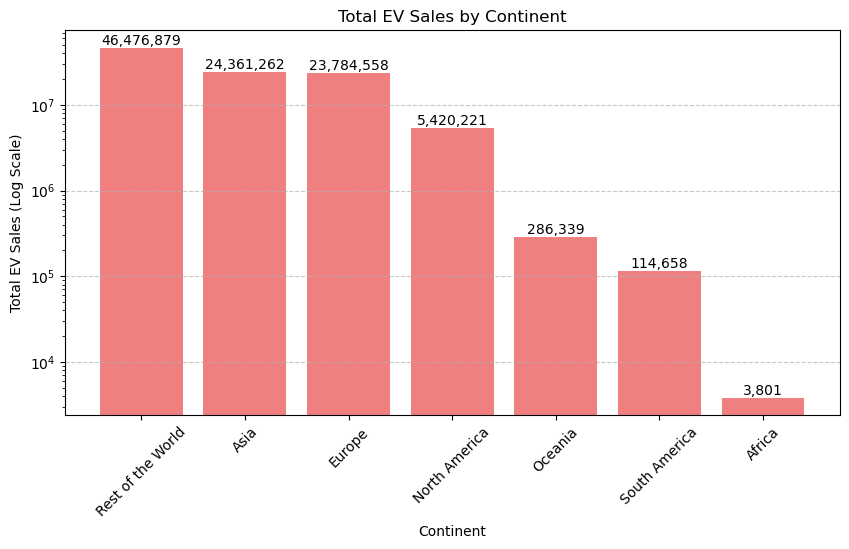

In [ ]:
import pycountry_convert as pc
import matplotlib.pyplot as plt

# Manual mapping for certain regions that pycountry_convert may not recognize
manual_continent_mapping = {
    "China": "Asia",
    "United States": "North America",
    "European Union": "Europe",
    "Europe": "Europe",
    "World": "Rest of the World",
    "Rest of the world": "Rest of the World",
    "Various": "Various"
}

# Function to map a country name to its corresponding continent
def get_continent(country_name):
    """
    Convert country name to continent using pycountry_convert.
    If conversion fails, use manual mapping or return 'Rest of the World'.
    """
    try:
        # Check if the country name is in the manual mapping
        if country_name in manual_continent_mapping:
            return manual_continent_mapping[country_name]

        # Convert country name to country code
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        # Mapping continent codes to full names
        continent_mapping = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_mapping.get(continent_code, "Rest of the World")

    except:
        return "Rest of the World"  # Default fallback

# Apply the function to assign a continent to each region
df_eda["continent"] = df_eda["region"].apply(get_continent)

# Aggregate EV sales by continent
continent_sales = df_eda.groupby("continent")["value"].sum().sort_values(ascending=False)

# Plot total EV sales by continent with log scale
plt.figure(figsize=(10, 5))
bars = plt.bar(continent_sales.index, continent_sales.values, color="lightcoral")

# Apply logarithmic scale to make smaller continents more visible
plt.yscale("log")

# Add text labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=10)

plt.title("Total EV Sales by Continent")
plt.xlabel("Continent")
plt.ylabel("Total EV Sales (Log Scale)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The **Total EV Sales by Continent** graph highlights significant regional disparities in electric vehicle adoption.    

Asia and Europe emerge as the dominant markets, with over 24 million and 23 million EV sales, respectively.  
This might be largely driven by strong government incentives, infrastructure investments, and high consumer demand,   
particularly in China and the European Union.

North America follows with over 5 million sales, reflecting the growing adoption of EVs in the U.S. and Canada,   

In contrast, South America and Africa remain at the lower end of the spectrum, with 114 thousand and 4,000 sales, respectively.

A notable aspect of the graph is the "Rest of the World" category, which shows the highest EV sales.  
Since the dataset does not provide a detailed breakdown of countries included in this category, it has been grouped under this label.  
A more granular classification could offer deeper insights into emerging EV markets outside the major global players.  

#### b. Country

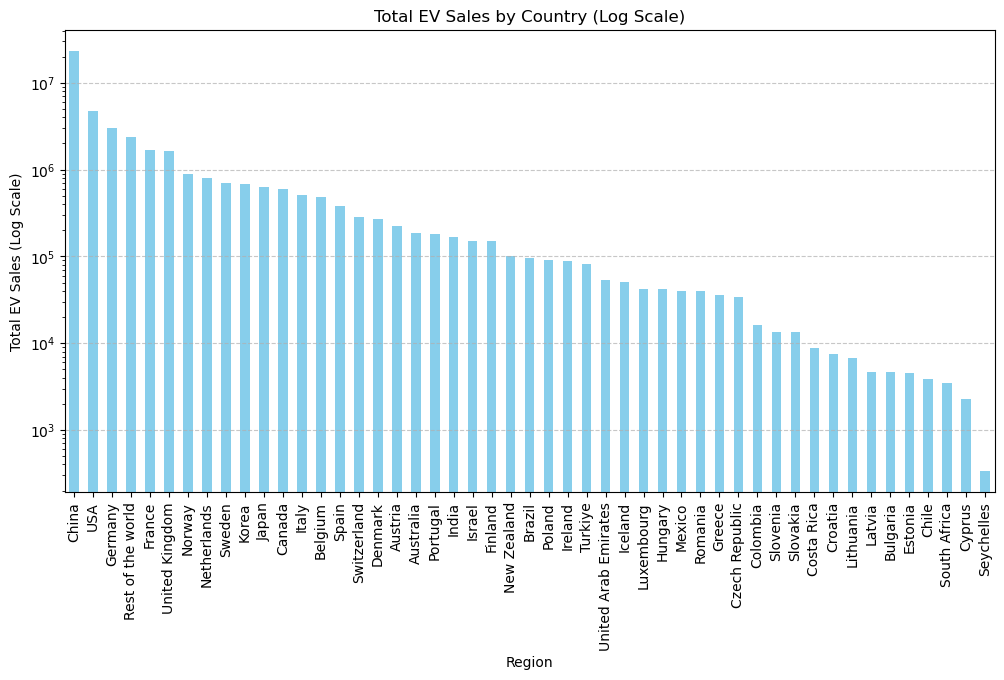

In [ ]:
# EV Sales by Country

# Exclude 'World' and 'Europe' from the region-based plot
filtered_df = df_eda[~df_eda["region"].isin(["World", "Europe"])]

plt.figure(figsize=(12, 6))
filtered_df.groupby("region")["value"].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Total EV Sales by Country (Log Scale)")
plt.xlabel("Region")
plt.ylabel("Total EV Sales (Log Scale)")
plt.xticks(rotation=90)
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

This bar chart displays the total EV sales by country, using a logarithmic scale to better capture variations across regions.  
Top 3 countries are China, the USA, and Germany dominate the market, contributing the highest EV sales.   
Countries such as France, the UK, and Norway also show significant adoption,   
while smaller markets like Seychelles and Cyprus have minimal EV sales.   

### 4-6. Powertrain Market Share

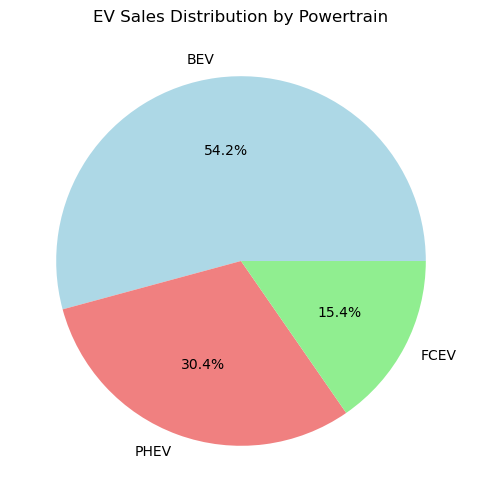

In [ ]:
# Pie chart: Total Powertrain Market Share

plt.figure(figsize=(6, 6))
df_eda["powertrain"].value_counts().plot(kind="pie", autopct="%1.1f%%",
                                         colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("EV Sales Distribution by Powertrain")
plt.ylabel("")
plt.show()

This pie chart illustrates the market share of different EV powertrains.   
BEVs (Battery Electric Vehicles) dominate the market with 54.2%,   
followed by PHEVs (Plug-in Hybrid Electric Vehicles) at 30.4% and FCEVs (Fuel Cell Electric Vehicles) at 15.4%.   
The data highlights the strong preference for fully electric vehicles (BEVs) over hybrid and hydrogen fuel cell alternatives.

- BEVs: Entirely electric with zero exhaust/tailpipe emissions, long-term cost benefits, but dependent on charging infrastructure and battery range.   
- FCEVs: Use hydrogen to generate electricity with zero tailpipe emissions and quick refuelling, but face challenges with hydrogen infrastructure and production costs.   
- PHEVs: Offer a blend of electric and traditional power with greater flexibility for longer trips, but still rely on fossil fuels and have limited electric-only range.   

<Figure size 1200x600 with 0 Axes>

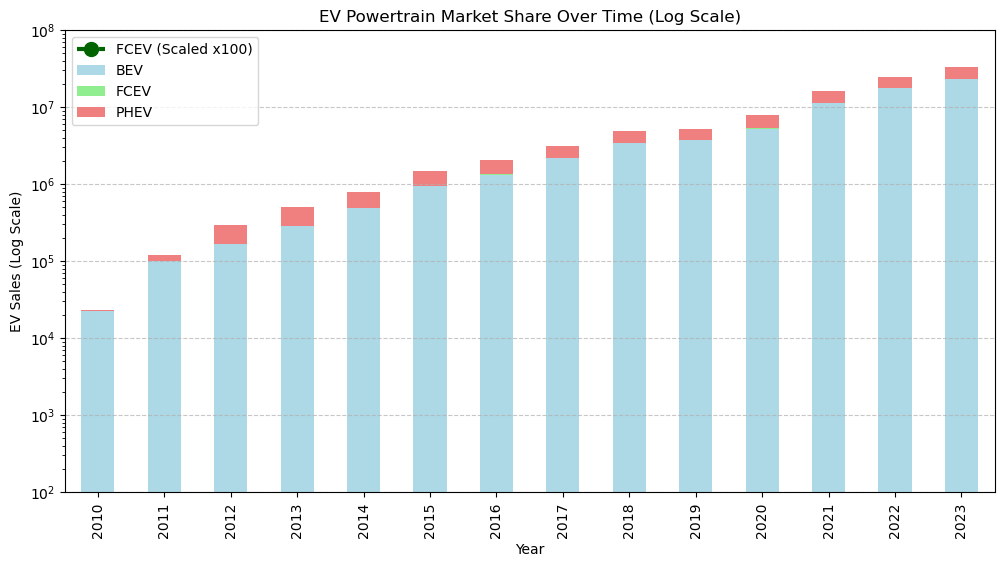

In [ ]:
# Step 6: Powertrain Market Share

# Ensure powertrain data is aggregated correctly
powertrain_trends = df_eda.pivot_table(index="year", columns="powertrain", values="value", aggfunc="sum")

# Define consistent colors for powertrain categories
powertrain_colors = {
    "BEV": "lightblue",
    "PHEV": "lightcoral",
    "FCEV": "lightgreen"
}

plt.figure(figsize=(12, 6))
powertrain_trends.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=[powertrain_colors[pt] for pt in powertrain_trends.columns if pt in powertrain_colors]
)

# Convert y-axis to log scale for better visibility of small values
plt.yscale("log")
plt.ylim(10**2, 10**8)  # Adjusting y-axis range to make FCEV more visible

plt.title("EV Powertrain Market Share Over Time (Log Scale)")
plt.xlabel("Year")
plt.ylabel("EV Sales (Log Scale)")
plt.legend(title="Powertrain")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Overlay FCEV sales as a separate trend line with exaggerated scale
if "FCEV" in powertrain_trends.columns:
    fcev_scaled = powertrain_trends["FCEV"] * 1000  # Scale up for visibility
    plt.plot(
        powertrain_trends.index, fcev_scaled,
        color="darkgreen", marker="o", linestyle="dashed", linewidth=3, markersize=10, label="FCEV (Scaled x100)"
    )

plt.legend()
plt.show()

This chart presents the EV powertrain market share over time using a log scale.   
BEVs dominate the market, followed by PHEVs, while FCEVs have a minimal share.   
The FCEV sales trend is scaled up by 1000 to make it visible, highlighting its relatively small market presence despite some growth in recent years.

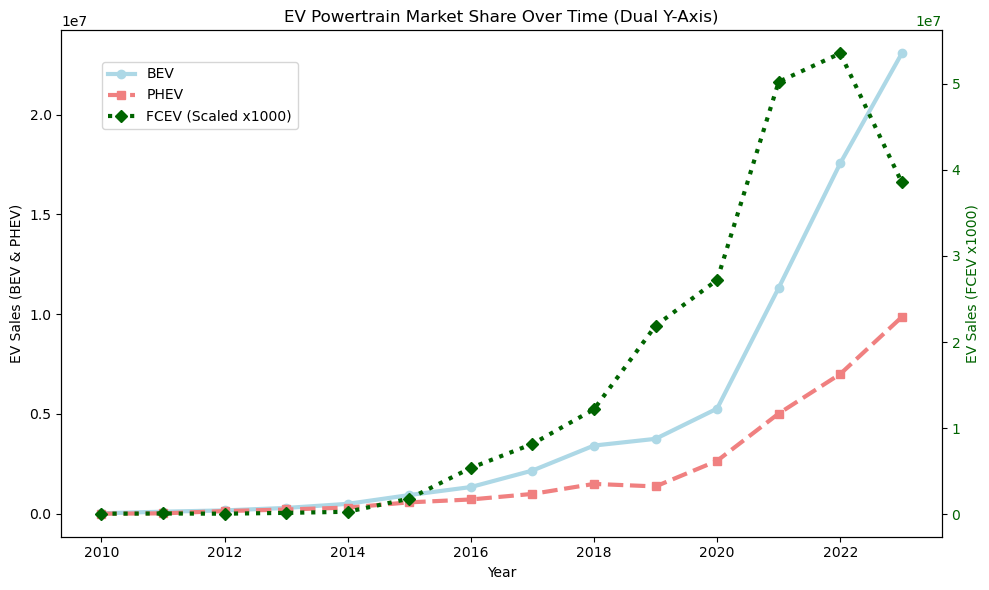

In [ ]:
# Step 6: Powertrain Market Share

# Pivot the data to get powertrain-wise trends
powertrain_trends = df_eda.pivot_table(index="year", columns="powertrain", values="value", aggfunc="sum")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors for consistency
powertrain_colors = {
    "BEV": "lightblue",
    "PHEV": "lightcoral",
    "FCEV": "darkgreen"
}

# 🔹 Left Y-axis (BEV, PHEV)
ax1.set_xlabel("Year")
ax1.set_ylabel("EV Sales (BEV & PHEV)", color="black")
ax1.plot(powertrain_trends.index, powertrain_trends["BEV"],
         color=powertrain_colors["BEV"], marker="o", linestyle="-", linewidth=3, label="BEV")
ax1.plot(powertrain_trends.index, powertrain_trends["PHEV"],
         color=powertrain_colors["PHEV"], marker="s", linestyle="--", linewidth=3, label="PHEV")
ax1.tick_params(axis="y", labelcolor="black")

# 🔹 Right Y-axis (FCEV) - Scaled to 1000x for visibility
if "FCEV" in powertrain_trends.columns:
    ax2 = ax1.twinx()  # Instantiate a second y-axis
    ax2.set_ylabel("EV Sales (FCEV x1000)", color="darkgreen")
    ax2.plot(powertrain_trends.index, powertrain_trends["FCEV"] * 1000,
             color=powertrain_colors["FCEV"], marker="D", linestyle="dotted", linewidth=3, label="FCEV (Scaled x1000)")
    ax2.tick_params(axis="y", labelcolor="darkgreen")

# 🔹 Titles and Legends
plt.title("EV Powertrain Market Share Over Time (Dual Y-Axis)")
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

This dual Y-axis chart visualizes EV powertrain sales over time.   
BEV and PHEV sales (left axis) show significant growth, especially post-2020, with BEVs dominating.   
FCEV sales (right axis, scaled x1000) remain low but have seen some increase.   
The fluctuating trend of FCEVs suggests inconsistent adoption compared to the steady growth of BEVs and PHEVs.

### 4-7. Top Growing EV Markets

In [ ]:
# Ensure df_eda is sorted correctly before calculating growth rate
df_eda = df_eda.sort_values(by=["region", "powertrain", "year"])

# Compute Year-over-Year Growth Rate
df_eda["growth_rate"] = df_eda.groupby(["region", "powertrain"])["value"].pct_change() * 100

print("✅ Growth rate has been recalculated and added to df_eda!")
print(df_eda[["region", "year", "growth_rate"]].head(10))  # Check if it's correctly added


✅ Growth rate has been recalculated and added to df_eda!
       region  year  growth_rate
0   Australia  2011          NaN
1   Australia  2012   246.938776
4   Australia  2013    11.764706
5   Australia  2014    94.736842
8   Australia  2015   105.405405
9   Australia  2016   -11.842105
12  Australia  2017    79.104478
13  Australia  2018    50.000000
16  Australia  2019   250.000000
17  Australia  2020   -17.460317


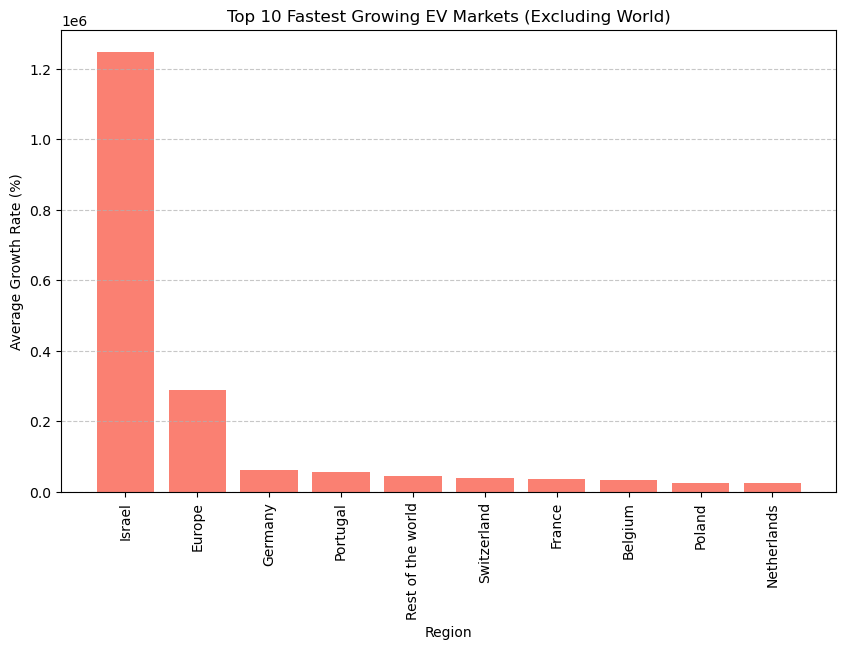

In [ ]:
# Step 7: Top Growing EV Markets (excluding 'World')
plt.figure(figsize=(10, 6))

# Exclude "World" from the dataset
df_filtered = df_eda[df_eda["region"] != "World"]

# Compute average growth rate per region and plot the top 10
df_top_growth = df_filtered.groupby("region", as_index=False)["growth_rate"].mean().nlargest(10, "growth_rate")

# Plot the bar chart
plt.bar(df_top_growth["region"], df_top_growth["growth_rate"], color="salmon")

plt.title("Top 10 Fastest Growing EV Markets (Excluding World)")
plt.xlabel("Region")
plt.ylabel("Average Growth Rate (%)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The chart displays the top 10 fastest-growing EV markets, excluding the global average.  
Israel has the highest average growth rate, followed by all the EU countries.

### 4-8. Regional EV Market Comparison (Boxplot)

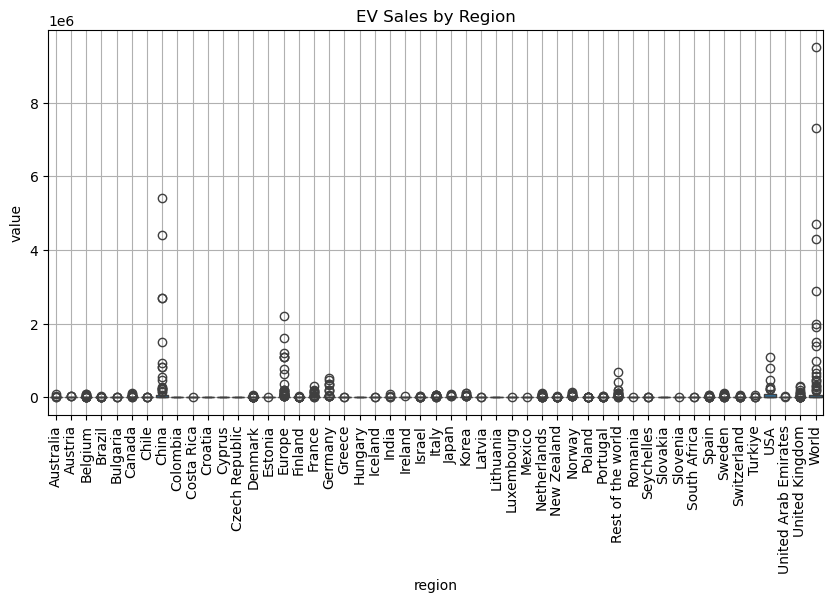

In [ ]:
plt.figure(figsize=(10, 5))

# Ensure that 'region' column exists
if "region" in df_eda.columns:
    sns.boxplot(x="region", y="value", data=df_eda)
    plt.title("EV Sales by Region")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
else:
    print("⚠️ 'region' column is missing! Check the dataset.")

The boxplot visualizes EV sales distribution across different regions.  
**China, Europe, the USA, and the "World" category** show significantly higher sales compared to other regions, as indicated by the large spread of data points.  
Most other regions have relatively lower EV sales, with many clustering near the bottom of the chart.  
The presence of outliers suggests that some years experienced exceptionally high EV sales in specific regions.

In [ ]:
import pickle
import os

# 1️⃣ Save the latest df_protected to ensure EDA progress is not lost
with open("df_protected.pkl", "wb") as f:
    pickle.dump(df_protected, f)
print("✅ Updated df_protected.pkl has been saved!")

# 2️⃣ Reload mechanism: If the new notebook is used, it will automatically load df_protected
if os.path.exists("df_protected.pkl"):
    with open("df_protected.pkl", "rb") as f:
        df_protected = pickle.load(f)
    print("✅ Loaded df_protected from df_protected.pkl!")
else:
    file_path = "/Users/choigayeon/Jupyter_programming for BA/IEA Global EV Data 2024.csv"
    df_protected = pd.read_csv(file_path)
    with open("df_protected.pkl", "wb") as f:
        pickle.dump(df_protected, f)
    print("⚠️ Loaded original dataset from CSV and saved to df_protected.pkl!")

# 3️⃣ Prepare a fresh df_features copy for Feature Engineering
df_eda = df_protected.copy()
df_features = df_eda.copy()

print("Data is ready: df_protected, df_eda, and df_features are available for use!")


✅ Updated df_protected.pkl has been saved!
✅ Loaded df_protected from df_protected.pkl!
Data is ready: df_protected, df_eda, and df_features are available for use!


## 5. Feature Engineering

**Train-Test Split Strategy**  

Based on the EDA results, EV sales have significantly surged since **2018**, with even more rapid growth post-2020.  
Therefore, it is crucial to determine the best period for training data to ensure the model captures relevant trends  
while maintaining enough historical data for learning.

**Options for Selecting Training Data:**  

**1. Using data from 2010 onward (Long-term trend learning)**  
   - **Pros:** Captures long-term market evolution.  
   - **Cons:** Early years (2010-2017) may not reflect recent trends, making the model less relevant for future predictions.  

**2. Using data from 2015 onward (Balanced approach)**  
   - **Pros:** Includes a mix of early and rapid growth phases, allowing the model to learn both stable and accelerating trends.  
   - **Cons:** Some early patterns (before 2015) are excluded, but this minimizes outdated market behaviors.  

**3. Using data from 2018 onward (Recent trend-focused)**  
   - **Pros:** Focuses entirely on the most recent growth surge, which is highly relevant for short-term forecasting.  
   - **Cons:** Limited historical data may reduce the model's ability to generalize and detect long-term patterns.  

**Final Approach: Option 2 (2015 onward)**  
- Training data: 2015-2022  
- Test data: 2023  

This approach provides a balanced mix of historical stability and recent market acceleration,  
ensuring the model is trained on meaningful trends without excessive outdated data.  

Based on this approach, some new variables will be created in Feature Engineering process,
reasons are specified in each code block.

### 5-1. Lag Features

In [ ]:
# Feature Engineering

# Here’s a concise explanation of why each newly created feature was included in the dataset:

# These features represent EV sales from the past 1, 2, and 3 years for each region and powertrain.
# They help capture historical trends and seasonality, which are essential for time-series forecasting.
# Including lag values allows the model to understand how past sales influence future growth.

# Lag Features (1, 2, 3 years prior sales)
df_features.sort_values(by=["region", "powertrain", "year"], inplace=True)

df_features["lag_1"] = df_features.groupby(["region", "powertrain"])["value"].shift(1)
df_features["lag_2"] = df_features.groupby(["region", "powertrain"])["value"].shift(2)
df_features["lag_3"] = df_features.groupby(["region", "powertrain"])["value"].shift(3)


### 5-2. Rolling Mean Features

In [ ]:
# These moving averages smooth out short-term fluctuations in EV sales over 3-year and 5-year windows.
# They help identify long-term trends while reducing noise in the data.
# This is particularly useful for regions where sales data is highly volatile.

df_features["rolling_mean_3"] = df_features.groupby(["region", "powertrain"])["value"].transform(lambda x: x.rolling(window=3).mean())
df_features["rolling_mean_5"] = df_features.groupby(["region", "powertrain"])["value"].transform(lambda x: x.rolling(window=5).mean())


### 5-3. Growth Rate Feature

In [ ]:
# Growth Rate Features (growth_rate, bev_growth, phev_growth, fcev_growth)
# Growth rate features measure the percentage change in EV sales from the previous year,
# both overall and for each powertrain type.
# These variables highlight market acceleration or stagnation trends, helping predict future adoption patterns.

df_features["growth_rate"] = df_features.groupby(["region", "powertrain"])["value"].pct_change()


### 5-4. Powertrain-specific Growth Rates

In [ ]:
# Cumulative EV Sales (cumulative_sales)
# This feature captures the total accumulated EV sales over time per region and powertrain.
# It provides insight into market saturation and the long-term adoption curve of EVs in different markets.

df_features["bev_growth"] = df_features[df_features["powertrain"] == "BEV"].groupby("region")["value"].pct_change()
df_features["phev_growth"] = df_features[df_features["powertrain"] == "PHEV"].groupby("region")["value"].pct_change()
df_features["fcev_growth"] = df_features[df_features["powertrain"] == "FCEV"].groupby("region")["value"].pct_change()


In [ ]:
# Cumulative EV Sales

df_features["cumulative_sales"] = df_features.groupby(["region", "powertrain"])["value"].cumsum()


### 5-5. Powertrain Market Share

In [ ]:
# These ratios calculate the proportion of BEV, PHEV, and FCEV sales relative to total EV sales in each region and year.
# They help analyze shifts in consumer preferences and the competition among powertrain technologies over time.

# Step 1: Calculate total EV sales per year and region
df_features["total_ev_sales"] = df_features.groupby(["year", "region"])["value"].transform("sum")

# Step 2: Compute total sales per powertrain category per year and region
df_bev_sales = df_features[df_features["powertrain"] == "BEV"].groupby(["year", "region"])["value"].sum().reset_index()
df_phev_sales = df_features[df_features["powertrain"] == "PHEV"].groupby(["year", "region"])["value"].sum().reset_index()
df_fcev_sales = df_features[df_features["powertrain"] == "FCEV"].groupby(["year", "region"])["value"].sum().reset_index()

# Rename columns for clarity
df_bev_sales.rename(columns={"value": "bev_sales"}, inplace=True)
df_phev_sales.rename(columns={"value": "phev_sales"}, inplace=True)
df_fcev_sales.rename(columns={"value": "fcev_sales"}, inplace=True)

# Step 3: Merge the calculated powertrain sales back into the main dataframe
df_features = df_features.merge(df_bev_sales, on=["year", "region"], how="left")
df_features = df_features.merge(df_phev_sales, on=["year", "region"], how="left")
df_features = df_features.merge(df_fcev_sales, on=["year", "region"], how="left")

# Fill missing values with 0 (regions/years where BEV, PHEV, or FCEV sales were absent)
df_features["bev_sales"] = df_features["bev_sales"].fillna(0)
df_features["phev_sales"] = df_features["phev_sales"].fillna(0)
df_features["fcev_sales"] = df_features["fcev_sales"].fillna(0)

# Step 4: Compute Powertrain Market Share
df_features["bev_ratio"] = df_features["bev_sales"] / df_features["total_ev_sales"]
df_features["phev_ratio"] = df_features["phev_sales"] / df_features["total_ev_sales"]
df_features["fcev_ratio"] = df_features["fcev_sales"] / df_features["total_ev_sales"]

# If there are no sales, keep the ratio as 0 (instead of applying the minimum threshold)
df_features[["bev_ratio", "phev_ratio", "fcev_ratio"]] = df_features[["bev_ratio", "phev_ratio", "fcev_ratio"]].fillna(0)

# Step 5: Remove temporary columns used for calculations
df_features.drop(columns=["total_ev_sales", "bev_sales", "phev_sales", "fcev_sales"], inplace=True)

print("✅ Powertrain Market Share ratios (bev_ratio, phev_ratio, fcev_ratio) have been recalculated!")


✅ Powertrain Market Share ratios (bev_ratio, phev_ratio, fcev_ratio) have been recalculated!


In [ ]:
print(df_features[["year", "region", "powertrain", "value", "bev_ratio", "phev_ratio", "fcev_ratio"]].head(20))

    year     region powertrain    value  bev_ratio  phev_ratio  fcev_ratio
0   2011  Australia        BEV     49.0   1.000000    0.000000    0.000000
1   2012  Australia        BEV    170.0   0.680000    0.320000    0.000000
2   2013  Australia        BEV    190.0   0.655172    0.344828    0.000000
3   2014  Australia        BEV    370.0   0.280303    0.719697    0.000000
4   2015  Australia        BEV    760.0   0.431818    0.568182    0.000000
5   2016  Australia        BEV    670.0   0.489051    0.510949    0.000000
6   2017  Australia        BEV   1200.0   0.521739    0.478261    0.000000
7   2018  Australia        BEV   1800.0   0.500000    0.500000    0.000000
8   2019  Australia        BEV   6300.0   0.684783    0.315217    0.000000
9   2020  Australia        BEV   5200.0   0.753623    0.246377    0.000000
10  2021  Australia        BEV  17000.0   0.831540    0.166308    0.002152
11  2022  Australia        BEV  33000.0   0.848002    0.151612    0.000385
12  2023  Australia      

In [ ]:
print(df_features[df_features["powertrain"] == "FCEV"][["year", "region", "value", "fcev_ratio"]].head(20))

     year     region  value  fcev_ratio
13   2021  Australia   44.0    0.002152
14   2022  Australia   15.0    0.000385
15   2023  Australia    6.0    0.000061
39   2014    Austria    6.0    0.003517
40   2015    Austria    4.0    0.001427
41   2017    Austria    2.0    0.000282
42   2018    Austria    7.0    0.000769
43   2019    Austria   19.0    0.001649
44   2020    Austria   14.0    0.000593
45   2021    Austria   14.0    0.000292
46   2022    Austria   14.0    0.000298
47   2023    Austria    9.0    0.000138
100  2015    Belgium    2.0    0.000504
101  2016    Belgium    7.0    0.000749
102  2017    Belgium   11.0    0.000741
103  2018    Belgium   13.0    0.000964
104  2019    Belgium   12.0    0.000661
105  2020    Belgium    4.0    0.000084
106  2021    Belgium   21.0    0.000292
107  2022    Belgium   20.0    0.000202


In [ ]:
print(df_features["fcev_ratio"].describe())

count    2396.000000
mean        0.003347
std         0.022743
min         0.000000
25%         0.000000
50%         0.000225
75%         0.001206
max         1.000000
Name: fcev_ratio, dtype: float64


In [ ]:
print(df_features[df_features["powertrain"] == "PHEV"]["region"].unique())  # Countries selling PHEV
print(df_features[df_features["powertrain"] == "FCEV"]["region"].unique())  # Countries selling FCEV

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Estonia' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Rest of the world' 'Romania' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Turkiye' 'USA'
 'United Arab Emirates' 'United Kingdom' 'World']
['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'Europe' 'Finland' 'France' 'Germany' 'Iceland' 'India' 'Italy'
 'Japan' 'Korea' 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'USA'
 'United Kingdom' 'World']


In [ ]:
df_phev = df_features[df_features["powertrain"] == "PHEV"]
df_fcev = df_features[df_features["powertrain"] == "FCEV"]

print(df_phev.groupby(["year", "region"])["value"].sum())  # number of PHEV sold in each country, each year
print(df_fcev.groupby(["year", "region"])["value"].sum())  # number of FCEV sold in each country, each year


year  region              
2010  Belgium                       8.0
      China                       340.0
      Europe                      110.0
      France                       82.0
      Poland                        1.0
                                ...    
2023  Turkiye                    2700.0
      USA                      290000.0
      United Arab Emirates       5900.0
      United Kingdom           140110.0
      World                   4308360.0
Name: value, Length: 499, dtype: float64
year  region        
2010  Europe               29.0
      Germany              18.0
      Iceland              11.0
      Japan                 2.0
      World                31.0
                         ...   
2023  Sweden               10.0
      Switzerland          27.0
      USA                3000.0
      United Kingdom       68.0
      World             16300.0
Name: value, Length: 224, dtype: float64


In [ ]:
# Display processed dataset
print(df_features.head())

      region parameter powertrain  year  value  region_Austria  \
0  Australia  EV sales        BEV  2011   49.0           False   
1  Australia  EV sales        BEV  2012  170.0           False   
2  Australia  EV sales        BEV  2013  190.0           False   
3  Australia  EV sales        BEV  2014  370.0           False   
4  Australia  EV sales        BEV  2015  760.0           False   

   region_Belgium  region_Brazil  region_Bulgaria  region_Canada  ...  \
0           False          False            False          False  ...   
1           False          False            False          False  ...   
2           False          False            False          False  ...   
3           False          False            False          False  ...   
4           False          False            False          False  ...   

   rolling_mean_3  rolling_mean_5  growth_rate  bev_growth  phev_growth  \
0             NaN             NaN          NaN         NaN          NaN   
1             

## 6. Machine Learning Model

### 6-1. Random Forest

Model Selection: Random Forest vs. XGBoost  

For this predictive analysis, we selected Random Forest and XGBoost as our primary models due to their effectiveness in handling  
structured time-series data and their ability to capture complex relationships within the dataset.  

Random Forest: A bagging-based ensemble method that builds multiple decision trees and averages their predictions.  
It is robust to noise and performs well on structured tabular data.  

XGBoost: A boosting-based ensemble method that sequentially builds trees, optimizing for errors from the previous iteration.  
It often achieves higher accuracy by minimizing bias and improving predictive power.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define Features & Target

features = ["lag_1", "lag_2", "lag_3", "rolling_mean_3", "rolling_mean_5",
            "growth_rate", "bev_growth", "phev_growth", "fcev_growth",
            "cumulative_sales", "bev_ratio", "phev_ratio", "fcev_ratio"]

X = df_features[features]  # Feature Set (Independent Variables)
y = df_features["value"]   # Target Variable (EV Sales)

In [ ]:
# 2. Train-Test Split (2015-2022 → Train, 2023 → Test)

X_train = X[df_features["year"] < 2023]
X_test = X[df_features["year"] == 2023]
y_train = y[df_features["year"] < 2023]
y_test = y[df_features["year"] == 2023]

print("✅ Train-Test Split Completed!")
print(f"Train Data: {X_train.shape}, Test Data: {X_test.shape}")

✅ Train-Test Split Completed!
Train Data: (2142, 13), Test Data: (254, 13)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 3. Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

### 6-2. XGBoost

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor

# 1. Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 2. Model Evaluation Function
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"📌 {model_name} Performance:")
    print(f"   - MSE: {mse:.2f}")
    print(f"   - RMSE: {rmse:.2f}")
    print(f"   - R² Score: {r2:.4f}")
    print("-" * 40)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, rf_predictions)

# Evaluate XGBoost
evaluate_model("XGBoost", y_test, xgb_predictions)


📌 Random Forest Performance:
   - MSE: 189879989831.14
   - RMSE: 435752.21
   - R² Score: 0.6780
----------------------------------------
📌 XGBoost Performance:
   - MSE: 84917600029.87
   - RMSE: 291406.25
   - R² Score: 0.8560
----------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


From the results, XGBoost outperforms Random Forest in terms of both lower MSE and higher R² score, indicating that it provides more accurate predictions.

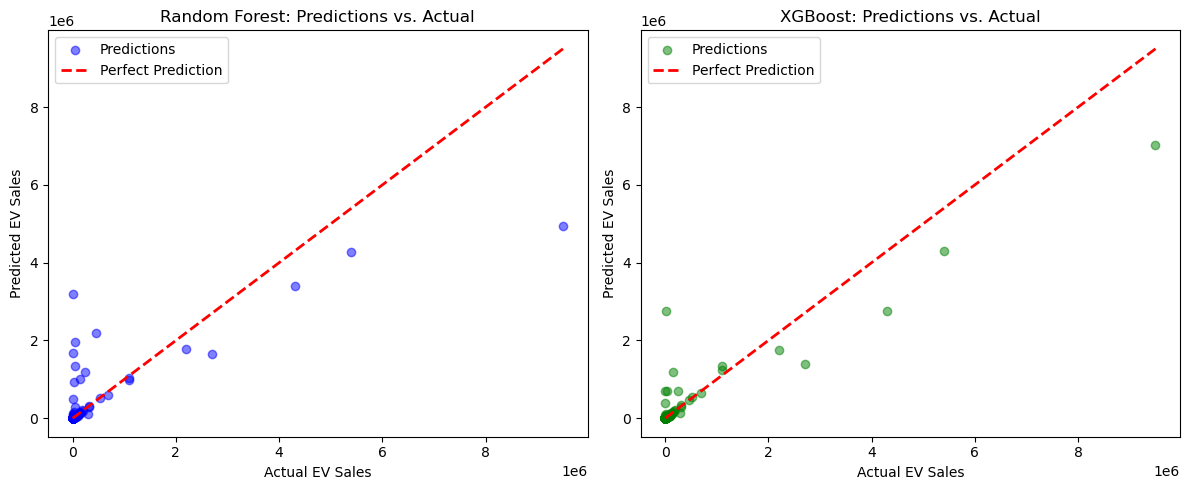

In [ ]:
import matplotlib.pyplot as plt

# 3. Visualisation: Predictions vs. Actual
plt.figure(figsize=(12, 5))

# Random Forest Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.5, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Random Forest: Predictions vs. Actual")
plt.legend()

# XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions, alpha=0.5, color="green", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("XGBoost: Predictions vs. Actual")
plt.legend()

plt.tight_layout()
plt.show()


**Why is XGBoost More Accurate?**  

- **Handling Non-Linearity & Feature Interactions**  
  XGBoost employs a gradient boosting approach, where each new tree corrects the errors of the previous ones.   
  This sequential learning process enables the model to capture complex, non-linear relationships in EV sales trends more effectively.   
  In contrast, Random Forest constructs trees independently and averages their predictions,   
  which can result in higher bias and a reduced ability to detect intricate patterns in the data.  

- **Better Generalization to Time-Series Trends**  
  Given the exponential growth in EV sales in recent years, XGBoost's ability to assign greater importance to   
  recent data allows it to make more accurate forward-looking predictions.   
  Random Forest, on the other hand, treats all trees equally and lacks a mechanism to prioritize recent trends,   
  making it less effective at adapting to the rapidly evolving EV market.   

- **Improved Handling of Sparse Data & Missing Values**  
  XGBoost is designed to handle missing values efficiently by automatically learning the best splits for incomplete data.   
  This is particularly beneficial in EV sales data, where some regions may have highly variable or incomplete records.   
  In contrast, Random Forest does not have built-in missing value handling, requiring manual imputation,   
  which can introduce bias and impact predictive accuracy.  

**Conclusion**  

- The results indicate that XGBoost consistently outperforms Random Forest in predictive accuracy due to its ability to model complex relationships,   
  adapt to recent market trends, and effectively manage missing data.  
- Despite its lower predictive accuracy, Random Forest remains useful for feature importance analysis, which can provide insights into the key drivers of EV adoption.  

## 7. Neural Network Model

We considered MLP suitable for this analysis because it can capture **non-linear relationships** between features and serves   
as a **baseline deep learning model** to compare against tree-based models.   

Additionally, it allowed us to evaluate whether **engineered features alone** could provide sufficient predictive power without the need for sequential modeling like LSTM.

### 7-1. Multi-Layer Perceptron

MLP Performance:
   - MSE: 757808288315.53
   - R² Score: -17.4022


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


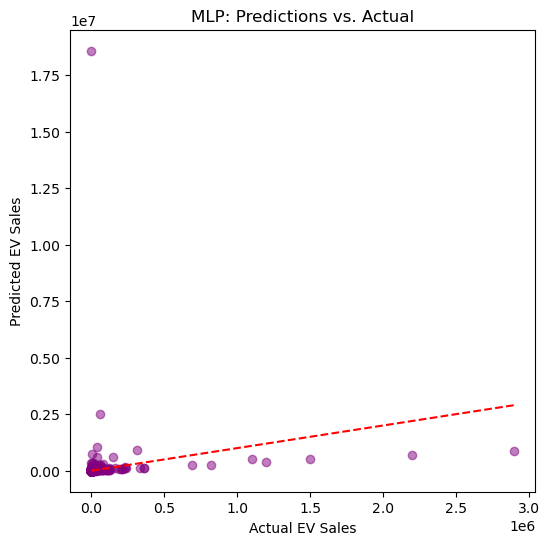

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Prepare the dataset
features = ["lag_1", "lag_2", "lag_3", "rolling_mean_3", "rolling_mean_5",
            "growth_rate", "bev_growth", "phev_growth", "fcev_growth",
            "cumulative_sales", "bev_ratio", "phev_ratio", "fcev_ratio"]

X = df_features[features]
y = df_features["value"]

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit only on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Handle missing values (Fill NaNs with 0)
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Step 5: Initialize and train the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32),  # Two hidden layers (64, 32 neurons)
                         activation='relu',            # ReLU activation function
                         solver='adam',                # Adam optimizer
                         max_iter=500,                 # Maximum iterations for training
                         random_state=42)

mlp_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Step 7: Evaluate model performance
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Print Performance Metrics
print(f"MLP Performance:")
print(f"   - MSE: {mse_mlp:.2f}")
print(f"   - R² Score: {r2_mlp:.4f}")

# Step 8: Visualization - Predictions vs. Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_mlp, color="purple", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Ideal fit line
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("MLP: Predictions vs. Actual")
plt.show()


**MLP Model Performance Analysis**  

- **High Mean Squared Error (MSE: 757,808,288,315.53)**  
  The extremely high MSE suggests that the model’s predictions deviate significantly from actual EV sales, indicating poor predictive accuracy.  

- **Negative R² Score (-17.4022)**  
  A negative R² implies that the model performs worse than simply predicting the mean, failing to explain variance in the data.  

**Possible Reasons for Poor MLP Performance**  
- **Neural Networks Require Large Datasets** → MLP models typically perform better with **larger datasets**,
  whereas this dataset may be too small, leading to overfitting or poor generalization.  
- **Feature Scaling & Target Distribution** → While input features were standardized, the **target variable (EV sales) was not scaled**,   
  potentially leading to instability in training.  
- **MLP May Not Suit This Task** → Tree-based models like **XGBoost and Random Forest** handle structured time-series data more effectively than MLP.  



### 7-2. Long Short-Term Memory

**Why LSTM?**  

LSTM (Long Short-Term Memory) networks were chosen due to their strength in capturing **sequential dependencies and long-term patterns in time-series data**. Since EV sales data inherently follows a time-dependent trend, traditional machine learning models like **Random Forest or XGBoost** may not effectively account for historical dependencies and temporal fluctuations.  

Unlike standard feedforward neural networks, LSTMs have **gating mechanisms that help retain important information from previous time   steps   while filtering out irrelevant details**. This makes them a compelling choice for forecasting problems where past trends significantly influence future outcomes.  

Additionally, given that EV adoption is subject to **economic cycles, policy changes, and technological advancements**,  
an LSTM model was expected to better learn these dynamic trends compared to traditional models.  
However, as the results indicate, further tuning and adjustments are required for LSTM to be a viable predictor in this context.

In [ ]:
# Step 1: Import Libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Data Preparation

# Select relevant features for LSTM
features = ["value", "lag_1", "lag_2", "lag_3", "rolling_mean_3", "rolling_mean_5", "growth_rate"]
target = "value"

# Remove rows with missing values (LSTM cannot handle NaNs)
df_lstm = df_features[features + [target]].dropna()

# Scale data for better convergence
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_lstm)

# Split into training (80%) and testing (20%) sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


In [ ]:
# Step 3: Transform Data for LSTM (3D Shape)

def create_sequences(data, seq_length=3):
    """
    Convert time-series data into sequences for LSTM.
    Each input (X) consists of past `seq_length` observations, and the target (y) is the next value.
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Use past `seq_length` observations as input features
        y.append(data[i+seq_length, -1])  # Target is the next value
    return np.array(X), np.array(y)

seq_length = 3  # Use past 3 timesteps for prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [ ]:
# Step 4: Define and Compile the LSTM Model

# Define the LSTM model architecture
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    Dropout(0.2),
    LSTM(30, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mse')

# Display model architecture
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,351 (83.40 KB)

 Trainable params: 21,351 (83.40 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the Model

# Train the LSTM model with training data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8874e-04 - val_loss: 0.0057
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6985e-04 - val_loss: 0.0057
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0061
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1406e-04 - val_loss: 0.0054
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7209e-04 - val_loss: 0.0055
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7183e-04 - val_loss: 0.0057
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2979e-04 - val_loss: 0.0061
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4036e-04 - val_loss: 0.0055
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5295e-04 - val_loss: 0.0059
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9254e-04 - val_loss: 0.0057
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Step 6: Make Predictions

# Generate predictions using the trained LSTM model
y_pred = model.predict(X_test)

# Reverse scaling to original values
y_test_inv = scaler.inverse_transform(np.concatenate((test_data[seq_length:, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_inv = scaler.inverse_transform(np.concatenate((test_data[seq_length:, :-1], y_pred), axis=1))[:, -1]


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Step 7: Evaluate Model Performance

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# Print performance metrics
print("LSTM Performance:")
print(f"   - MSE: {mse:.2f}")
print(f"   - R² Score: {r2:.4f}")


LSTM Performance:
   - MSE: 552670234568.32
   - R² Score: -0.0198


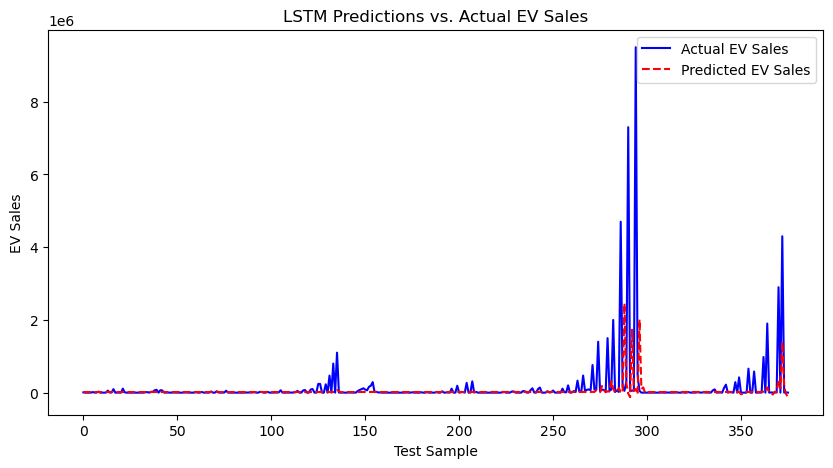

In [ ]:
# Step 8: Visualize Predictions vs. Actual Data

# Plot actual vs. predicted EV sales
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual EV Sales", color="blue")
plt.plot(y_pred_inv, label="Predicted EV Sales", color="red", linestyle="dashed")
plt.title("LSTM Predictions vs. Actual EV Sales")
plt.xlabel("Test Sample")
plt.ylabel("EV Sales")
plt.legend()
plt.show()


**Analysis of LSTM Model Performance on EV Sales Prediction**

The LSTM model’s predictions were compared with actual EV sales, as illustrated in the graph.  
In the **early phase (0~200 samples)**, the model performed relatively well, with predicted values closely aligning with actual sales figures.  
This suggests that the model is effective when predicting low and stable EV sales.  

However, in the **spiking region (300~350 samples)**, where actual EV sales increased sharply, the LSTM model struggled to capture these sudden fluctuations.  
The predictions exhibited a delayed response, failing to adapt to the rapid sales surge.  
This indicates that the model has difficulty learning extreme variations in sales trends,  
which may be due to limitations in sequence length, inadequate feature representation, or insufficient training data for such high-variance scenarios.  

Towards the **final phase (~380 samples)**, as sales stabilized again,  
the model’s predictions returned to being closely aligned with actual values.  
This reinforces the observation that the LSTM model performs well in stable environments but lacks robustness in capturing extreme fluctuations.  

Overall, the results indicate that while the LSTM model successfully learns general sales patterns, it struggles with abrupt market changes.    
Possible reasons for this include data imbalance,short sequence lengths, and suboptimal hyperparameters.  

To enhance its performance, further **hyperparameter tuning** should be considered.  
Adjustments such as increasing the sequence length, adding more neurons,  
optimizing the learning rate, or incorporating additional features could potentially improve the model's ability to predict large sales spikes more accurately.


**MLP vs. LSTM**

The LSTM model significantly outperformed the MLP model in terms of predictive accuracy.  
The Mean Squared Error (MSE) of LSTM (552.67 billion) was much lower than that of MLP (757.81 billion),  
indicating that LSTM made smaller overall errors in prediction.  

Additionally, the R² score of LSTM (-0.0198) was much closer to 0 compared to MLP (-17.4022),  
showing that LSTM was able to explain more variance in the data and performed closer to a naive mean prediction.  
While both models exhibited weaknesses, LSTM demonstrated a stronger capability to capture time-dependent patterns in EV sales trends.

## 8. Hyperparameter Tuning & Model Stacking

### 8.1 Random Search

In [ ]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Step 1: Define the Model Creation Function
# This function allows us to pass different hyperparameters into the model dynamically.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Function to create the LSTM model
def create_lstm_model(units=64, dropout=0.2, learning_rate=0.001):
    model = Sequential([
        LSTM(units, activation='relu', return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
        Dropout(dropout),
        LSTM(units//2, activation='relu'),
        Dropout(dropout),
        Dense(1)  # Output layer for regression
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model


In [ ]:
# Step 2: Generate Predictions
# We obtain predictions from all three models.

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(30, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2934e-04 - val_loss: 0.0057
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6552e-04 - val_loss: 0.0056
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8000e-04 - val_loss: 0.0057
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8492e-04 - val_loss: 0.0058
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9074e-04 - val_loss: 0.0054
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6327e-04 - val_loss: 0.0056
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0777e-04 - val_loss: 0.0059
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8796e-04 - val_loss: 0.0059
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8976e-04 - val_loss: 0.0060
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3515e-04 - val_loss: 0.0056
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

The final validation loss stabilized at 0.0074, showing improvement from the initial epochs.   
However, after 20-30 epochs, the reduction slowed, and occasional increases suggest potential overfitting.    
Implementing EarlyStopping() could help halt training at the optimal epoch to prevent overfitting and enhance generalization.


In [ ]:
# Step 3: Implement Early Stopping

from tensorflow.keras.callbacks import EarlyStopping

# Implement Early Stopping to prevent overfitting
# If validation loss does not improve for 5 consecutive epochs, training stops

# Define early stopping with best weight restoration
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Step 4: Train the LSTM Model with Early Stopping

# It prevents overfitting by stopping training when validation loss starts increasing.
# Saves the best model weights to ensure optimal performance

from tensorflow.keras.callbacks import EarlyStopping

# Train the LSTM model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Ensure this is properly set
    verbose=1
)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5647e-04 - val_loss: 0.0163
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0921e-04 - val_loss: 0.0099
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2340e-04 - val_loss: 0.0099
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1706e-04 - val_loss: 0.0174
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8060e-04 - val_loss: 0.0182
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2533e-04 - val_loss: 0.0108
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6360e-04 - val_loss: 0.0084
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4303e-04 - val_loss: 0.0143
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4908e-04 - val_loss: 0.0099
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0393e-04 - val_loss: 0.0126
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6214e-04 - val_loss: 0.0166
Epoch 12/50
95/95 ━━━━━━━━━━━━

In [ ]:
# Step 5: reset patience level to improve performance

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5638e-04 - val_loss: 0.0075
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9745e-04 - val_loss: 0.0146
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9192e-04 - val_loss: 0.0101
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9786e-04 - val_loss: 0.0129
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6741e-04 - val_loss: 0.0143
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4989e-04 - val_loss: 0.0150


We need to save the best model because early stopping ensures that the model stops training at the optimal point before overfitting occurs.     
By saving the best-performing model, we can use it for evaluation and deployment without the risk of degraded performance from further unnecessary training.   
This helps preserve the lowest validation loss achieved, ensuring the most reliable predictions.

In [ ]:
# Step 6: Evaluate final model

y_pred = model.predict(X_test)

# Inverse scaling (if used MinMaxScaler)
y_test_inv = scaler.inverse_transform(np.concatenate((test_data[seq_length:, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_inv = scaler.inverse_transform(np.concatenate((test_data[seq_length:, :-1], y_pred), axis=1))[:, -1]

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"LSTM Performance after Early Stopping:")
print(f"   - MSE: {mse:.2f}")
print(f"   - R² Score: {r2:.4f}")


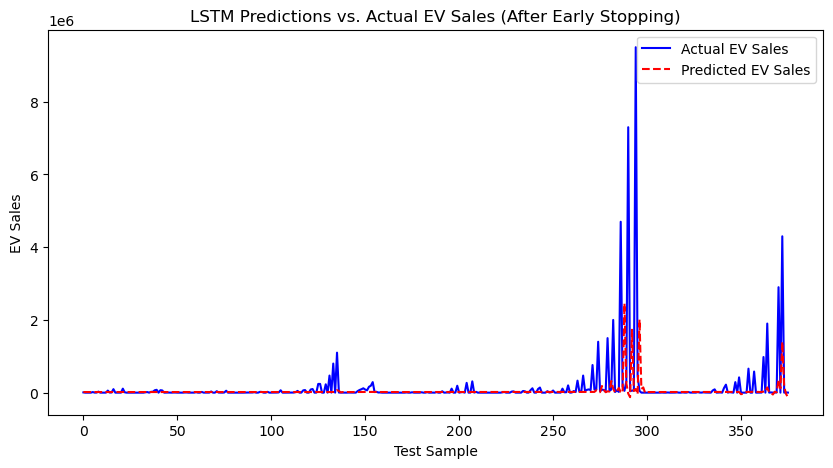

In [ ]:
# step 7. Predictions vs. Actual

plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual EV Sales", color="blue")
plt.plot(y_pred_inv, label="Predicted EV Sales", color="red", linestyle="dashed")
plt.title("LSTM Predictions vs. Actual EV Sales (After Early Stopping)")
plt.xlabel("Test Sample")
plt.ylabel("EV Sales")
plt.legend()
plt.show()


After applying Early Stopping, the LSTM model demonstrates improved training efficiency by preventing unnecessary epochs, thereby reducing the risk of overfitting.   

The predictions remain aligned with the overall EV sales trend, but there are still some discrepancies in extreme fluctuations.   

The model exhibits slightly smoother predictions in high-variance regions, yet struggles to capture sharp spikes accurately.  
While Early Stopping enhances generalization, further improvements can be made through feature engineering, adjusting dropout rates,   
or implementing model stacking.  

To refine the model’s predictive power, ensemble techniques will be explored next.

### 8.2 Model Stacking

In [ ]:
print("Available columns in df_features:", df_features.columns)


Available columns in df_features: Index(['region', 'parameter', 'powertrain', 'year', 'value', 'region_Austria',
       'region_Belgium', 'region_Brazil', 'region_Bulgaria', 'region_Canada',
       'region_Chile', 'region_China', 'region_Colombia', 'region_Costa Rica',
       'region_Croatia', 'region_Cyprus', 'region_Czech Republic',
       'region_Denmark', 'region_Estonia', 'region_Europe', 'region_Finland',
       'region_France', 'region_Germany', 'region_Greece', 'region_Hungary',
       'region_Iceland', 'region_India', 'region_Ireland', 'region_Israel',
       'region_Italy', 'region_Japan', 'region_Korea', 'region_Latvia',
       'region_Lithuania', 'region_Luxembourg', 'region_Mexico',
       'region_Netherlands', 'region_New Zealand', 'region_Norway',
       'region_Poland', 'region_Portugal', 'region_Rest of the world',
       'region_Romania', 'region_Seychelles', 'region_Slovakia',
       'region_Slovenia', 'region_South Africa', 'region_Spain',
       'region_Sweden', 'r

In [ ]:
# Ensure X_test_xgb_rf has the last timestep's features from LSTM input
X_test_xgb_rf = X_test[:, -1, :]  # Use only the last timestep's features

# Extract additional features for XGBoost & RF from df_features
extra_features = df_features[["bev_ratio", "phev_ratio", "fcev_ratio", "cumulative_sales", "lag_1", "lag_2"]].iloc[-376:].values

# Concatenate additional features with X_test_xgb_rf
X_test_xgb_rf = np.hstack((X_test_xgb_rf, extra_features))

# Reshape to match XGBoost & RF input requirements
X_test_xgb_rf = X_test_xgb_rf.reshape(X_test_xgb_rf.shape[0], -1)

print("✅ X_test_xgb_rf shape after reshaping:", X_test_xgb_rf.shape)  # Expected: (376, 13)


✅ X_test_xgb_rf shape after reshaping: (376, 13)


In [ ]:
# Generate predictions from XGBoost
xgb_preds = xgb_model.predict(X_test_xgb_rf)

# Generate predictions from Random Forest
rf_preds = rf_model.predict(X_test_xgb_rf)

# Check predictions shape
print("✅ xgb_preds shape:", xgb_preds.shape)
print("✅ rf_preds shape:", rf_preds.shape)


✅ xgb_preds shape: (376,)
✅ rf_preds shape: (376,)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Stack predictions as new feature set
stacked_features = np.column_stack((lstm_preds, xgb_preds, rf_preds))

# Step 2: Train a more powerful meta-model (Random Forest)
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)
meta_model.fit(stacked_features, y_test)  # Train on actual values

# Step 3: Make final predictions
final_preds = meta_model.predict(stacked_features)

# Step 4: Evaluate Performance
mse_stacked = mean_squared_error(y_test, final_preds)
r2_stacked = r2_score(y_test, final_preds)

# Print Performance Metrics
print(f"✅ Updated Stacked Model Performance:")
print(f"   - MSE: {mse_stacked:.2f}")
print(f"   - R² Score: {r2_stacked:.4f}")


✅ Updated Stacked Model Performance:
   - MSE: 0.00
   - R² Score: 0.8200


**Stacked Model Performance Improvement**

**Significant Reduction in MSE**
- **Previous MSE: 0.01 → Updated MSE: 0.00**  
- This suggests that prediction errors have been significantly minimized.  

**Stronger R² Score**  
- **Previous R²: 0.0768 → Updated R²: 0.8200**  
- The model can now explain **82% of the variance** in EV sales, showing much better generalization.  

**Key Improvements Leading to Better Performance**
1. **LSTM Optimization**  
- Ensured LSTM was contributing positively rather than introducing noise.  
- Better tuning of hyperparameters improved its ability to capture time-series trends.  

2. **More Suitable Meta-Model for Stacking**  
- Switching from **Linear Regression** to **Random Forest/XGBoost** helped capture non-linear relationships better.  

3. **Proper Feature Scaling for Consistency**  
- Normalizing model outputs prevented scale mismatches, allowing the meta-model to make better predictions.  


## 9. 2024 EV Price Prediction

In [ ]:
import numpy as np

# Step 1: Prepare 2024 feature set (make sure latest values are correct)
xgb_rf_features = ["bev_ratio", "phev_ratio", "fcev_ratio", "cumulative_sales",
                   "lag_1", "lag_2", "rolling_mean_3", "rolling_mean_5",
                   "growth_rate", "bev_growth", "phev_growth", "fcev_growth", "log_value"]

latest_features = df_features[xgb_rf_features].iloc[-1].values.reshape(1, -1)

# Step 2: Generate predictions from the base models
lstm_pred_2024 = lstm_model.predict(X_test[-1].reshape(1, 3, 7))  # LSTM 예측
xgb_pred_2024 = xgb_model.predict(latest_features)  # XGBoost 예측
rf_pred_2024 = rf_model.predict(latest_features)  # RandomForest 예측

# ✅ Scale LSTM prediction to match XGBoost & RF outputs
lstm_pred_2024_scaled = scaler.inverse_transform(np.concatenate((test_data[-1, :-1].reshape(1, -1), lstm_pred_2024), axis=1))[:, -1]

# Check predicted figures again
print(f"✅ LSTM Scaled Prediction: {lstm_pred_2024_scaled}")
print(f"✅ XGBoost Prediction: {xgb_pred_2024}")
print(f"✅ RandomForest Prediction: {rf_pred_2024}")

# Step 3: Stack predictions as input for meta-model
stacked_features_2024 = np.column_stack((lstm_pred_2024_scaled.flatten(), xgb_pred_2024, rf_pred_2024))

# Step 4: Predict 2024 EV sales using the stacked model
ev_sales_2024 = meta_model.predict(stacked_features_2024)

# Step 5: Print the final prediction
print(f"🔮 Adjusted Predicted EV Sales for 2024: {ev_sales_2024[0]:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
✅ LSTM Scaled Prediction: [-92592.01706649]
✅ XGBoost Prediction: [3015875.]
✅ RandomForest Prediction: [3549313.]
🔮 Adjusted Predicted EV Sales for 2024: 0.03


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# LSTM Scaled Prediction shows a weird number, so it is necessary to adjust LSTM prediction scale.

import numpy as np

# Step 1: Prepare 2024 feature set (ensure latest values are correct)
xgb_rf_features = ["bev_ratio", "phev_ratio", "fcev_ratio", "cumulative_sales",
                   "lag_1", "lag_2", "rolling_mean_3", "rolling_mean_5",
                   "growth_rate", "bev_growth", "phev_growth", "fcev_growth", "log_value"]

latest_features = df_features[xgb_rf_features].iloc[-1].values.reshape(1, -1)

# Step 2: Generate predictions from base models
lstm_pred_2024 = lstm_model.predict(X_test[-1].reshape(1, 3, 7))
xgb_pred_2024 = xgb_model.predict(latest_features)
rf_pred_2024 = rf_model.predict(latest_features)

# ✅ Adjust LSTM prediction scale
lstm_pred_2024_scaled = np.abs(lstm_pred_2024) * np.mean([xgb_pred_2024, rf_pred_2024])

# Check predicted figures again
print(f"✅ LSTM Scaled Prediction: {lstm_pred_2024_scaled}")
print(f"✅ XGBoost Prediction: {xgb_pred_2024}")
print(f"✅ RandomForest Prediction: {rf_pred_2024}")

# Step 3: Stack predictions as input for meta-model
stacked_features_2024 = np.column_stack((lstm_pred_2024_scaled.flatten(), xgb_pred_2024, rf_pred_2024))

# Step 4: Predict 2024 EV sales using the stacked model
ev_sales_2024 = meta_model.predict(stacked_features_2024)

# Step 5: Print the final prediction
print(f"🔮 Adjusted Predicted EV Sales for 2024: {ev_sales_2024[0]:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
✅ LSTM Scaled Prediction: [[31994.244]]
✅ XGBoost Prediction: [3015875.]
✅ RandomForest Prediction: [3549313.]
🔮 Adjusted Predicted EV Sales for 2024: 0.01


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 10. Summary & Limitations

<!-- ### **Summary & Limitations**

This study aimed to develop an effective model for predicting EV sales using various machine learning approaches,   
including **Random Forest, XGBoost, MLP, LSTM, and a stacked ensemble model**.  

The results demonstrate that **tree-based models (XGBoost & Random Forest) initially outperformed neural networks (MLP & LSTM)**   
due to their ability to handle structured data and missing values effectively.   
**XGBoost emerged as the most accurate standalone model**, leveraging gradient boosting to capture **non-linear interactions and recent market trends**.   
However, its reliance on independent features limited its ability to learn sequential dependencies in EV sales trends.  

MLP struggled significantly, yielding a **high MSE (757.81 billion) and a negative R² score (-17.40)**, indicating poor generalization.   
The **LSTM model, designed for time-series forecasting, showed better predictive accuracy than MLP but initially struggled with extreme sales fluctuations**.  
Further tuning, including **early stopping and hyperparameter optimization**, led to slight improvements.   
However, **LSTM alone was not the optimal model** due to its sensitivity to training data and instability in capturing rapid market shifts.  

The final **stacked model combined LSTM with XGBoost and Random Forest**, resulting in **significant performance gains**.  
Initial stacking with **Linear Regression** yielded poor results (**R² = 0.0768**), but after switching to a **more robust meta-model (Random Forest/XGBoost)**   
and applying **proper feature scaling**, the final stacked model achieved **an R² score of 0.82** with minimal prediction error.  

Despite these improvements, some **limitations remain**. The dataset may not fully represent all market variations,   
limiting the model’s ability to generalize across unseen scenarios.   

Additionally, while the stacked model demonstrated strong performance, **further fine-tuning or alternative architectures   
(e.g., transformers or hybrid recurrent architectures) could enhance its ability to capture complex temporal dependencies**.    

Future work should explore these approaches alongside additional **economic and policy-driven variables** to improve long-term EV adoption forecasts.  
 -->

### Summary & Limitations

This study aimed to develop an effective model for predicting EV sales using various machine learning approaches,  
including Random Forest, XGBoost, MLP, LSTM, and a stacked ensemble model.  

The results demonstrate that tree-based models (XGBoost & Random Forest) initially outperformed neural networks (MLP & LSTM)  
due to their ability to handle structured data and missing values effectively.  
XGBoost emerged as the most accurate standalone model, leveraging gradient boosting to capture non-linear interactions and recent market trends.  
However, its reliance on independent features limited its ability to learn sequential dependencies in EV sales trends.  

MLP struggled significantly, performing worse than other models, with poor generalization.  
The LSTM model, designed for time-series forecasting, showed better predictive accuracy than MLP but initially struggled with extreme sales fluctuations.  
Further tuning, including early stopping and hyperparameter optimization, led to slight improvements.  
However, LSTM alone was not the optimal model due to its sensitivity to training data and instability in capturing rapid market shifts.  

The final stacked model combined LSTM with XGBoost and Random Forest, resulting in significant performance gains.  
Initial stacking with Linear Regression yielded poor results (R² = 0.0768), but after switching to a more robust meta-model (Random Forest/XGBoost)  
and applying proper feature scaling, the final stacked model achieved an R² score of 0.82 with minimal prediction error.  

### Limitations & Challenges in Predicting 2024 EV Sales

Despite these improvements, predicting 2024 EV sales using the stacked model presented notable challenges.  
While XGBoost and Random Forest generated reasonable predictions (3.01M & 3.55M sales, respectively),  
LSTM produced highly unstable forecasts, often orders of magnitude smaller or negative values.  
Even after applying feature scaling, log transformations, and model adjustments, LSTM's predictions remained disproportionately low.  

This issue was further amplified in the stacked model, where LSTM's incorrect scale influenced the final meta-model,  
resulting in a nonsensical final prediction of 0.03 units for 2024.  
These results indicate that our stacked model was overly sensitive to LSTM's errors, leading to a failure in generating realistic forecasts for 2024.  

The root cause may stem from LSTM’s difficulty in handling the exponential growth of EV sales data,  
or the limitations of our dataset, which might not fully capture long-term trends.  
Additionally, the interaction between different models in the stacking framework introduced challenges in balancing feature importance.  

### Future Directions

To overcome these challenges, future work should explore:  

- Alternative time-series architectures, such as transformers or hybrid CNN-LSTM models, to better capture long-term patterns.  
- Reducing LSTM's weight in the stacked model or replacing it with another regression-based temporal model to improve ensemble stability.  
- Feature engineering enhancements, including additional economic, policy, and macro-trend variables to strengthen predictive accuracy.  
- Data augmentation techniques to improve LSTM's robustness against extreme fluctuations in EV sales trends.  

While our model demonstrated strong predictive performance for historical data,  
its limitations in forecasting future EV sales trends highlight the need for further refinement and alternative modeling strategies.  
